


# Fixed Income and Credit
# Master in Computational Finance (MCF)

# 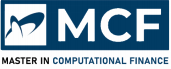

## Final Exam

**Professor**: N. Vasiljevic

## Principal Component Analysis

Principal component analysis (PCA) is a statistical technique commonly used in finance to reduce the dimensionality of the data set. This is particularly important for strongly correlated systems such as yield curves, where multicollinearity issues are pervasive.

Consider the collection of (continuously compounded) spot rates provided in in the Excel sheet PCA.

Importing libraries:

In [1]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

#### (a) Run a PCA on the covariance matrix of the spot rates. Report the fraction of variance explained by each principal component. Is there one dominant component? Discuss your findings.

Hint: Running a PCA boils down to an eigenvalue decomposition. For example, you
can use numpy.linalg.eig in Python.

##### Exploratory data analysis

In [2]:
# Uploading dataset: MCF21_FIC_Final_Exam_Group_5.xlsx
uploaded = files.upload()

Saving MCF21_FIC_Final_Exam_Group_5.xlsx to MCF21_FIC_Final_Exam_Group_5 (5).xlsx


In [3]:
# Importing data set
data = pd.read_excel(
    "MCF21_FIC_Final_Exam_Group_5.xlsx",
    sheet_name="PCA",
    index_col="Date",
    parse_dates=True)
    
data

,1Y,2Y,3Y,4Y,5Y
Date,,,,,
2000-01-31,5.846560,6.266558,6.410019,6.484924,6.517380
2000-02-29,5.695945,5.976489,6.071618,6.140687,6.164093
2000-03-31,5.810097,5.949711,5.968400,5.991754,5.988499
2000-04-28,5.921478,6.162471,6.215636,6.208064,6.186903
2000-05-31,6.059305,6.204318,6.171701,6.117370,6.078339
...,...,...,...,...,...
2021-01-29,0.134510,0.143850,0.254900,0.351580,0.435510
2021-02-26,0.234690,0.308770,0.533870,0.742780,0.904050
2021-03-31,0.164690,0.237680,0.497850,0.749060,0.956490


In [4]:
# Data set statistical properties
data.describe()

,1Y,2Y,3Y,4Y,5Y
count,257.000000,257.000000,257.000000,257.000000,257.000000
mean,2.042774,2.223748,2.399487,2.555831,2.697142
std,1.491234,1.518874,1.535065,1.545848,1.554078
min,0.134510,0.143850,0.247620,0.269920,0.293780
25%,0.947013,1.074708,1.203211,1.325147,1.406880
50%,1.650560,1.692350,1.924990,2.163140,2.367311
75%,2.879028,3.276116,3.668300,3.862118,4.009064
max,6.059305,6.266558,6.410019,6.484924,6.517380


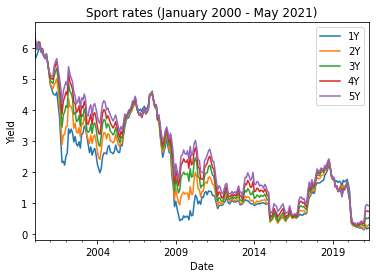

In [5]:
# Sport rate movement over time
data.plot(ylabel="Yield", title="Sport rates (January 2000 - May 2021)")

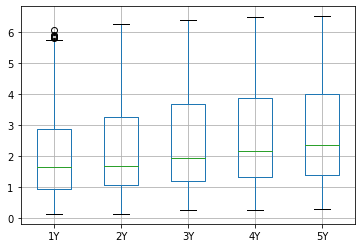

In [6]:
data.boxplot()

In [7]:
# 3D plot of spot rates over past 20 years

# Plotly 3D plot
fig = go.Figure(data=[go.Surface(z=data.values)])
fig.update_layout(title='Monthly Spot rate curve (January 2000 - May 2021)',
                  autosize=False,
                  width=500,
                  height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  )
# Axis labels
fig.update_scenes(xaxis = dict( title_text='Maturity'),
                  yaxis = dict( title_text='Months'),
                  zaxis = dict( title_text='Yield'),
                  )
fig.show()

In [8]:
# Sport rate correlations
data.corr()

,1Y,2Y,3Y,4Y,5Y
1Y,1.000000,0.985882,0.960462,0.935758,0.912856
2Y,0.985882,1.000000,0.993151,0.980317,0.965772
3Y,0.960462,0.993151,1.000000,0.996539,0.988863
4Y,0.935758,0.980317,0.996539,1.000000,0.997737
5Y,0.912856,0.965772,0.988863,0.997737,1.000000


In [9]:
# Corralation between bonds of diffrenent maturities
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(data)
fig.show()

Our data set is montly *sport rate curve* from *start of year 2000* to *end of May of 2021*. We're looking at sport rates of zero-coupon bons that have maturities of:
- 1 year
- 2 years
- 3 years
- 4 years
- 5 years

We can see that mean of sport rates (for the 20-year period) for ZCBs are diffrent from each other. But we will have to examine futher how spot rate curve changed over time, to examine it's movements over last. 20 years.

We can also notice quite a big difference in minimum and maximumun spot rates for 20 year period. Maximum yields for these bonds were somewhere aroung 6%-6.5%, while minimum yileds are in the range 0.13% - 0.30%. The yield curve changed dramatically over time. The yealds have been dicreasing over past 20 years and currenlty it's a period where they are on the bottom.

We can also notice some periods with higher volatility, where interest rates changed significantly in the short period of time. Some of those periods are:
- After the dot com bubble (2001-2002)
- After the GFC (2008-2009)
- After the Covid-19 global pandemic (2019-2020)

As we can see from the interactive 3D plot of sport rates over two past decades, we can notice some iteresting things:
- There are time when the yield curve is clearly upwards sloping.
- There are time when the yield curve is slightly downwards sloping.
- There are time when the yield curve is flat.

Flat and downward sloping YC could be noticed around the periods that we previosly mentioned, where were significant changes in yield, when there was turmoil on the markets like after the dot com bubble, GCF and covid-19.

What we could also notice is that for the 1y-5y bonds there is extreamly high correlation (e.g. higher for 1y and 2y than 1y and 5y). We alredy knew that both historically from the markets and from the theory. There is high correlation between bonds on the lower-end of maturities and high correlation between bonds on the higher-end of maturities. One of the reasons why near-term bonds' moev consolidates is because Central Banks can insluence and set the short term interest rates.

Thigh correlation means that spot rates are ideal for PCA, for selecting most dominant pricipal components, thus reducing data set dimensionality.

#### Principal Component Analysis

In [10]:
data.head()

,1Y,2Y,3Y,4Y,5Y
Date,,,,,
2000-01-31,5.846560,6.266558,6.410019,6.484924,6.517380
2000-02-29,5.695945,5.976489,6.071618,6.140687,6.164093
2000-03-31,5.810097,5.949711,5.968400,5.991754,5.988499
2000-04-28,5.921478,6.162471,6.215636,6.208064,6.186903
2000-05-31,6.059305,6.204318,6.171701,6.117370,6.078339


In [11]:
# Covariance matrix
covariance_matrix = data.cov()
covariance_matrix

,1Y,2Y,3Y,4Y,5Y
1Y,2.223778,2.233018,2.198633,2.157128,2.115537
2Y,2.233018,2.306977,2.315600,2.301732,2.279656
3Y,2.198633,2.315600,2.356423,2.364765,2.359042
4Y,2.157128,2.301732,2.364765,2.389646,2.396932
5Y,2.115537,2.279656,2.359042,2.396932,2.415158


In [12]:
# Eigendecomposition

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Dataframe with the results
eigendecomposition = pd.DataFrame({"Eigenvalues":eigenvalues}, index=[1,2,3,4,5])

# Fraction of variance explained for each principal component 
eigendecomposition["Fraction of variance explained"] = round(100 * eigendecomposition["Eigenvalues"] / np.sum(eigendecomposition["Eigenvalues"]), 5)

# Cumulative proportion of variance as we add up more principal components
eigendecomposition["Cumulative proportion of variance explained"] = np.cumsum(eigendecomposition["Fraction of variance explained"])

eigendecomposition

,Eigenvalues,Fraction of variance explained,Cumulative proportion of variance explained
1,11.433094,97.78576,97.78576
2,0.253886,2.17146,99.95722
3,0.004677,0.04000,99.99722
4,0.000318,0.00272,99.99994
5,0.000007,0.00006,100.00000


As we can see, from eigendecomposition, we calculated eigenvectors as the new basis vectors for covariance matrix as well as the corresponding eigenvalues (value that explanes for how much vectors are scaled after linear transformation is applied).

From the eigenvalues we calculated fraction of variance explained by each principal component.

As we can see, first principal component is absolutely dominant in term of amount of variance it captures in our data sets (97.78%). Second principal component accounts for 2.17% of variance accros our spot rate while third principal component explains 0.04% of variance.

Other two principal components (fourth and fifth) could be dropped off, as they are isignificant. 

By removing fourth and fith, and maybe even third principal component, we would have a significant dimensionality reduction compared to the original dataset.

#### (b) Plot the loadings for each factor. What can you say about the loadings for the three most dominant factors?

In [13]:
# Principal components (eigenvectors)
pcs = pd.DataFrame(eigenvectors, index=[1,2,3,4,5], columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
pcs

,PC1,PC2,PC3,PC4,PC5
1,0.427237,-0.731269,-0.483215,0.217347,-0.044467
2,0.447365,-0.263460,0.473440,-0.657651,0.271668
3,0.453687,0.088277,0.487259,0.355500,-0.650057
4,0.454413,0.336326,0.049729,0.485022,0.665338
5,0.452780,0.524334,-0.549967,-0.398284,-0.242840


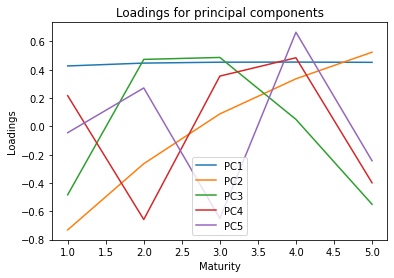

In [14]:
pcs.plot(title="Loadings for principal components", xlabel="Maturity", ylabel="Loadings")

Calculated eigenvectors, from eigendecomposition, are our principal components. Each column represents one principal component.


Rows are the loadings (betas), correlation bewtween the original component and factors, which tell us how much does the yield curve moves when a factor moves.

Intuition behind different factors:
- PCA1: The loadings, accross all maturities, for 1st principal component, seems to be nearly the same. That means that factor is something that affects the whole yield curve. That movement, yiled curve shift is equivalent to the level movement (yield curve goes up or down), factor that is moving everything up or down.
- PCA2: Loading are increasing, starting from the negative theritory (for 1y maturity) and go to the positive values and further increasing (for 3-5y maturities). It's lowering the short-end and and rising up the long-end of yield curve, which resembles the twist yield curve movement movement. So we can view this factor as slope.
- PCA3: Looking at this principal component, it looks like the curvature  movement, where sensitivity is highest for the middle section. It looks like that  we pulled down the short-end (1y and 2y) and the long-end (4y and 5y) and reversly, pushed up the middle section (3y).


#### (c) Plot the three most dominant factors over time. What do these two factors resemble?

In [15]:
factors = pd.DataFrame(eigenvectors.T.dot(data.T))
factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,14.107223,13.443193,13.285971,13.729035,13.696340,13.202487,13.301646,12.876681,12.764069,12.943346,12.379644,11.737879,11.103248,10.956593,10.830168,11.253009,11.497790,11.724808,10.917066,10.087802,8.919091,7.521074,8.227704,8.344917,8.817799,8.739223,10.420722,9.890612,9.828864,9.506981,8.568913,8.666119,8.049547,8.084931,8.439122,7.735207,8.605866,8.506990,9.032192,8.671206,...,4.174697,4.174697,4.379138,4.394910,4.372431,4.703534,4.650245,4.995757,5.245255,4.860030,4.199596,3.987715,4.020984,3.497744,3.541104,3.222901,3.301334,3.442980,2.942424,3.411779,3.372770,3.504492,3.803131,3.130992,2.579767,1.145512,0.747976,0.690539,0.665736,0.565125,0.651717,0.585558,0.656010,0.699367,0.615686,0.594419,1.227476,1.176022,1.186350,1.222395
1,0.237786,0.093458,-0.134235,-0.073132,-0.276251,-0.248631,-0.188275,-0.252397,-0.196971,-0.183678,-0.310977,-0.227183,0.042109,0.096499,0.223736,0.518797,0.646686,0.633110,0.720008,0.777434,1.151220,1.374723,1.643505,1.864794,1.732483,1.561035,1.371453,1.306187,1.097153,1.102825,1.106632,0.852008,0.855804,0.969444,0.967270,0.864470,0.737053,0.667790,0.610550,0.550111,...,0.216744,0.216744,0.262088,0.216335,0.172936,0.152799,0.048739,0.096114,0.061178,-0.036572,-0.096778,-0.129266,-0.062416,-0.197906,-0.201689,-0.289154,-0.310261,-0.243542,-0.326364,-0.338042,-0.276788,-0.250955,-0.144058,-0.313347,-0.255819,0.176240,0.039750,0.071316,0.044614,0.043268,0.093790,0.084845,0.138885,0.156813,0.169876,0.232838,0.517998,0.614345,0.555959,0.553789
2,0.003185,-0.049077,-0.078044,-0.009026,-0.022026,-0.095099,-0.057606,-0.098533,-0.118247,-0.098295,-0.128025,-0.181392,-0.206276,-0.179221,-0.169718,-0.128966,-0.083027,-0.067778,-0.067960,-0.103642,-0.194992,-0.199791,-0.072787,-0.042833,-0.035775,-0.035709,0.086735,0.024406,-0.004732,-0.050253,-0.250641,-0.157526,-0.188884,-0.201499,-0.179991,-0.213024,-0.190671,-0.217854,-0.180338,-0.226407,...,-0.051864,-0.051864,-0.017374,-0.010486,0.003576,-0.021203,-0.037092,-0.032374,-0.039978,-0.049765,-0.082968,-0.093953,-0.077584,-0.107928,-0.122608,-0.140344,-0.137259,-0.061352,-0.079019,-0.062231,-0.087602,-0.067265,-0.076584,-0.070852,-0.116969,-0.012926,-0.060790,-0.050914,-0.050573,-0.028187,-0.034704,-0.032091,-0.030315,-0.049660,-0.041755,-0.094723,-0.167348,-0.213259,-0.185661,-0.140749
3,-0.022150,-0.010677,-0.007249,-0.009177,-0.023109,0.010263,0.006380,0.009666,0.016414,0.007685,0.014753,0.031790,0.034415,0.026276,0.021818,0.024480,0.039366,0.035616,0.027508,0.040949,0.047614,0.030679,0.015029,0.019729,0.008585,-0.003009,-0.046552,-0.021933,-0.031169,-0.018174,0.016958,-0.007217,-0.018798,0.005214,-0.009258,-0.009563,-0.025148,-0.020823,-0.029568,-0.013370,...,0.001386,0.001386,-0.004635,-0.002671,-0.011063,-0.001344,0.003756,-0.001023,0.008104,0.010911,0.018783,0.017477,0.004177,0.018439,0.009689,0.018245,0.017722,0.000018,0.015028,0.011259,0.016899,0.013307,0.009181,0.009763,0.020024,0.013415,0.015106,0.015531,0.010409,0.001344,-0.003291,-0.000251,0.005042,0.013994,0.012101,0.022317,0.037933,0.038826,0.026137,0.017619
4,0.007551,0.012183,0.010480,-0.001650,-0.001829,-0.001063,-0.001381,-0.000843,-0.001572,-0.001382,-0.001633,-0.001474,-0.000864,-0.000835,-0.000753,-0.000356,-0.000119,-0.000240,0.000018,0.000176,0.001890,-0.002541,-0.006790,-0.006444,-0.001729,-0.002373,0.003585,0.000109,-0.001074,-0.003776,0.000329,-0.005056,-0.004881,-0.011506,-0.004231,-0.004839,0.002404,0.001817,0.002232,0.002321,...,-0.002447,-0.002447,-0.000832,-0.001200,0.000922,-0.000170,-0.001418,-0.000224,-0.001763,-0.004073,-0.004296,-0.004330,-0.001449,-0.004730,-0.002847,-0.004163,-0.003474,-0.000789,-0.001280,-0.003881,-0.003293,-0.003119,-0.001861,-0.003668,-0.002942,0.002880,0.000070,-0.000205,-0.

Text(0, 0.5, 'Value')

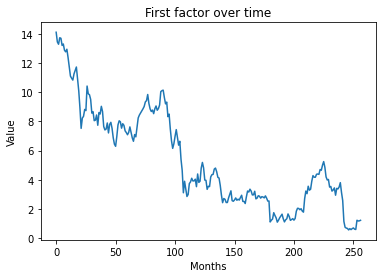

In [16]:
# First factor over time
plt.plot(factors.iloc[0,])
plt.title("First factor over time")
plt.xlabel("Months")
plt.ylabel("Value")

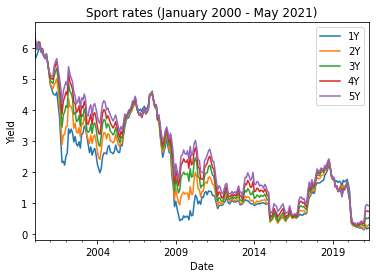

In [17]:
# Original yield curve
data.plot(ylabel="Yield", title="Sport rates (January 2000 - May 2021)")

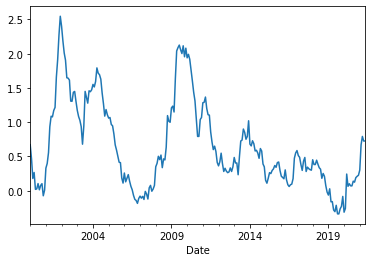

In [18]:
# Estimating yield curve slope
slope_estimation = data.loc[:, ("1Y", "5Y")]
slope_estimation["Slope"] = slope_estimation["5Y"] - slope_estimation["1Y"]
slope_estimation["Slope"].plot()

Text(0, 0.5, 'Value')

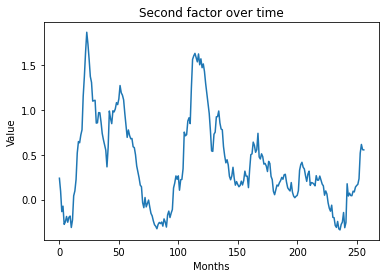

In [19]:
# Second factor over time
plt.plot(factors.iloc[1,])
plt.title("Second factor over time")
plt.xlabel("Months")
plt.ylabel("Value")

We plotted the first and second principal components over time.

If we shortly recall the fration of variance explained by those components:
- First component: 97.78576 %
- Second component: 2.17146	%

If we now compare the first factor over time with the spot rates over time they look nearly identical, which was expected from our eigenvalues we git, that the first component explaines most of the variance.

We estimated slope of yield curve as a diffrerence between the 5y and 1y bond spot rates. Visually if we compare that plot with the plot of the second factor over time, they look pretty similar, what we expected and explained in the previous section that it corresponds to the slope movement.